<a href="https://colab.research.google.com/github/kjousselin/Datavizualisation/blob/main/KPCA_sur_Swiss_Roll.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test de la méthode KPCA sur le dataset Swiss Roll


Par  Kévin Jousselin et Meriem Bencheikh

<ipython-input-15-64c2d6f5f87c>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig.add_axes(ax)


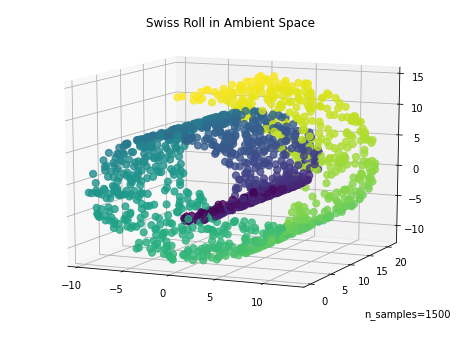

In [15]:
import matplotlib.pyplot as plt
from sklearn import manifold, datasets


sr_points, sr_color = datasets.make_swiss_roll(n_samples=1500, random_state=0)


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    sr_points[:, 0], sr_points[:, 1], sr_points[:, 2], c=sr_color, s=50, alpha=0.8
)
ax.set_title("Swiss Roll in Ambient Space")
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples=1500", transform=ax.transAxes)

### Illustration de la KPCA avec le noyau gaussien RBF
Le noyau gaussien est donné par la formule suivante:
$$k(x, y) = exp(− γ ||-x − y||{_2^2} )$$ avec $ γ=1/2σ^2$ \





Text(0.5, 1.0, 'Training data')

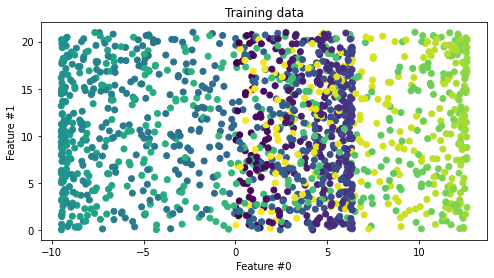

In [20]:
# Un exemple à l'aide d'un jeu de données 'construits' :

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

import matplotlib.pyplot as plt

_, train_ax = plt.subplots(1, sharex=True, sharey=True, figsize=(8, 4))

train_ax.scatter(sr_points[:, 0], sr_points[:, 1], c=sr_color)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")



## Utilisation de KPCA de sklearn et comparaison avec l'ACP

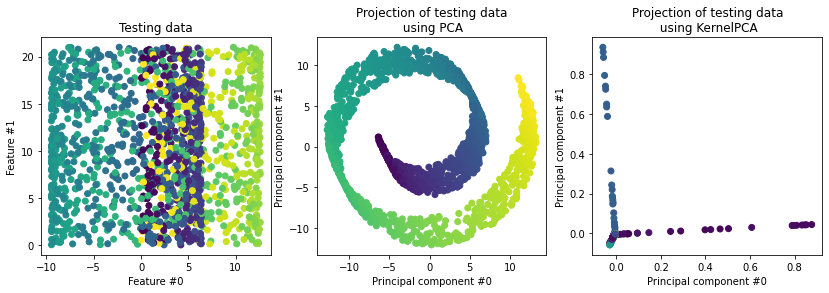

In [25]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=2)
kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=1.4, fit_inverse_transform=True, alpha=0.1
)

X_test_pca = pca.fit(sr_points).transform(sr_points)
X_test_kernel_pca = kernel_pca.fit(sr_points).transform(sr_points)

fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(
    ncols=3, figsize=(14, 4)
)

orig_data_ax.scatter(sr_points[:, 0], sr_points[:, 1], c=sr_color)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=sr_color)
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of testing data\n using PCA")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=sr_color)
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")



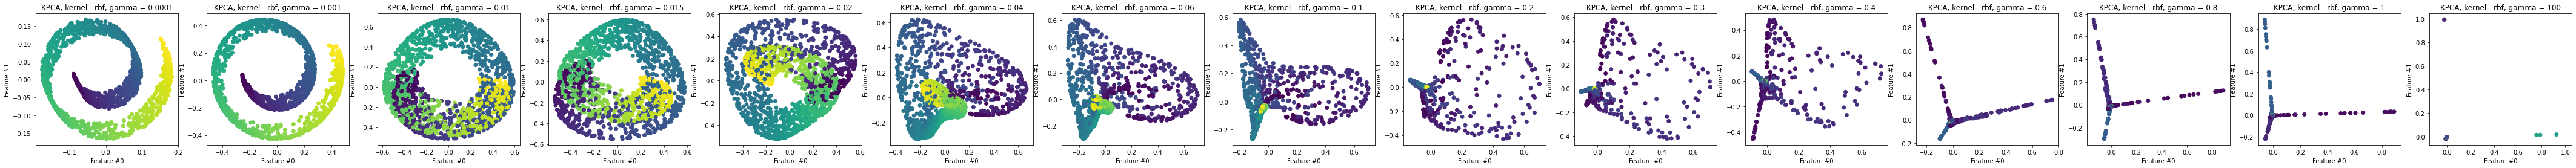

In [36]:

Gammas = [0.0001, 0.001, 0.01, 0.015, 0.02, 0.04, 0.06, .1,.2,.3,.4,.6,.8,1,100]

N = len(Gammas)

# Construction des KPCA pour gamma dans la liste
KPCA = []
X_test_kernel_pca = []

for gamma in Gammas:
  kernel_pca_gamma = KernelPCA(
      n_components=None, kernel="rbf", gamma=gamma, fit_inverse_transform=True, alpha=0.1
  )

  KPCA.append(kernel_pca_gamma)

  X_test_kernel_pca.append(kernel_pca_gamma.fit(sr_points).transform(sr_points))


fig, axs = plt.subplots(
    ncols=N, figsize=(N*5, 4)
)

for k in range(N):
  axs[k].scatter(X_test_kernel_pca[k][:, 0], X_test_kernel_pca[k][:, 1], c=sr_color)
  axs[k].set_ylabel("Feature #1")
  axs[k].set_xlabel("Feature #0")
  axs[k].set_title(f"KPCA, kernel : {KPCA[k].kernel}, gamma = {KPCA[k].gamma}")

plt.axis("equal")
plt.show()

## Test d'autres noyaux

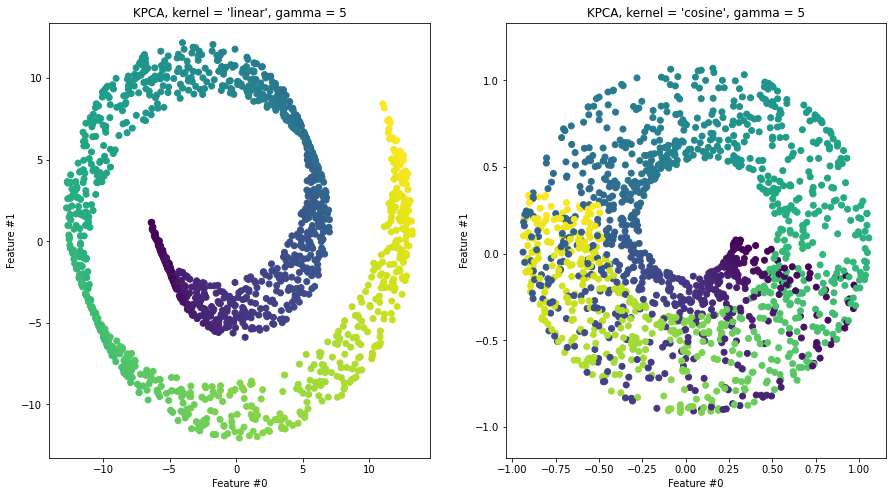

In [34]:
Kernels = ['linear', 'cosine'] #, 'poly']

# Construction des KPCA pour gamma dans la liste
KPCA = []
X_test_kernel_pca = []

for kernel in Kernels:
  # gamma = 5 uniquement pour le noyau 'poly'
  kernel_pca = KernelPCA(
      n_components=None, kernel=kernel, gamma=5, fit_inverse_transform=True, alpha=0.1    
  )

  KPCA.append(kernel_pca)

  X_test_kernel_pca.append(kernel_pca.fit(sr_points).transform(sr_points))


fig, axs = plt.subplots(
    ncols=2, figsize=(15, 8)
)

for k in range(2):
  axs[k].scatter(X_test_kernel_pca[k][:, 0], X_test_kernel_pca[k][:, 1], c=sr_color)
  axs[k].set_ylabel("Feature #1")
  axs[k].set_xlabel("Feature #0")
  axs[k].set_title(f"KPCA, kernel = '{KPCA[k].kernel}', gamma = {KPCA[k].gamma}")

plt.axis("equal")
plt.show()